## Set Up Environment

In [1]:
!pip install transformers -q
!pip install torch -q

In [5]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

In [6]:
from PIL import Image

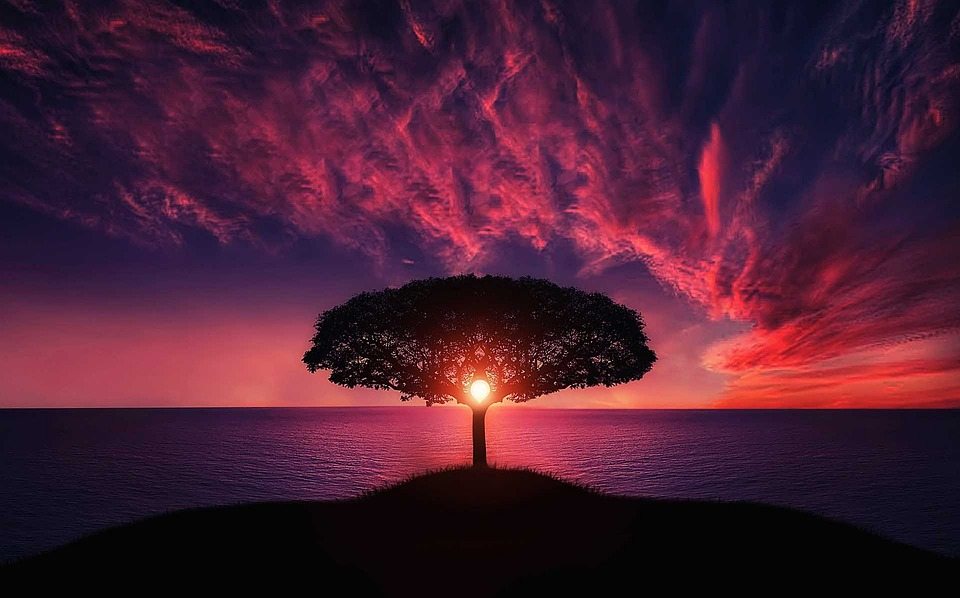

In [7]:
image = Image.open('/kaggle/input/image-for-classification/new-year-background-736885_960_720.jpg')
image

In [8]:
labels = ["it's a tree in the front of the see with the sun set in the background","it' a bridge to castle"]

In [9]:
data = processor(text = labels, images = image, return_tensors = 'pt', padding = True)

In [10]:
output = model(**data)

In [12]:
output.logits_per_image

tensor([[24.0898, 13.5780]], grad_fn=<TBackward0>)

In [13]:
prob = output.logits_per_image.softmax(dim = 1)[0]

In [14]:
prob

tensor([9.9997e-01, 2.7213e-05], grad_fn=<SelectBackward0>)

In [32]:
prob = list(prob)
for i in range(len(labels)):
    print("{}  = {}".format(labels[i],prob[i]))

it's a tree in the front of the see with the sun set in the background  = 0.9999728202819824
it' a bridge to castle  = 2.7213160137762316e-05
